In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets
import classical_part, utilities, entangled_circuit
import random, qiskit
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


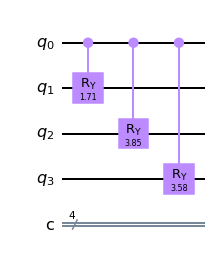

In [7]:
n = 4
qc = qiskit.QuantumCircuit(n, n)
qc = entangled_circuit.quanvolutional(qc)
qc.draw('mpl')

[3.18125929 2.27053764 4.18687009]
[2, 1, 0]


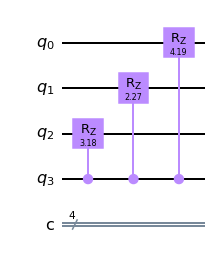

In [16]:
n = 4
qc = qiskit.QuantumCircuit(n, n)
thetas = np.random.uniform(low=0, high=2*np.pi, size=(n*n + 3*n,))
qc = entangled_circuit.decrease_r_layer(qc, thetas[2*n:2*n + n - 1], type = 'rz', control_index = n - 1)
qc.draw('mpl')

In [2]:
x_train, y_train, x_val, y_val, x_test, y_test = classical_part.load_mnist(
                  1200, 300, 300, False)

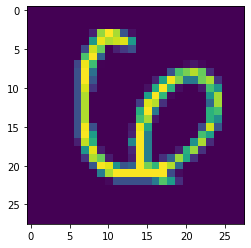

In [3]:
plt.imshow(x_train[0])

In [12]:
sub_image = x_train[0][5:5 + 4, 5:5 + 4] 
sub_image = np.squeeze(sub_image)
sub_image = sub_image / np.linalg.norm(sub_image)
print(classical_part.connector(sub_image.flatten(), entangled_circuit.quanvolutional1))


[3.43421668 1.40391258 0.31251935 3.08861863 4.87685459 0.52678866
 3.2697365  5.56802612]
[0.15464795 0.30263307 0.2100547  0.36014387 0.04663986 0.30052902
 0.11396958 0.3597932  0.22338038 0.02489797 0.34296077 0.03401554
 0.28755402 0.13641282 0.40362765 0.20549592]
[0.80373954 2.19575119 4.25059583 5.01029688 5.33127705 5.57160576
 6.1051789  5.06704521]
[0.19359438 0.51283474 0.0433464  0.21292453 0.0820067  0.25070619
 0.0169871  0.13472529 0.31836171 0.12125276 0.04803249 0.0263593
 0.62822988 0.18568659 0.12301005 0.03075251]


In [27]:
print(classical_part.quanv(x_train[0], entangled_circuit.quanvolutional1).shape)

(7, 7, 20)


In [28]:
x_train, xq_train, y_train, x_val, xq_val, y_val, x_test, xq_test, y_test = classical_part.load_mnist_fashion(
                  12, 4, 4, entangled_circuit.quanvolutional1, True)
            
hmodel = classical_part.hybrid_model()
hmodel.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
H2 = hmodel.fit(xq_train, y_train, validation_data=(xq_val, y_val),
        batch_size=1, epochs=100, verbose=0)

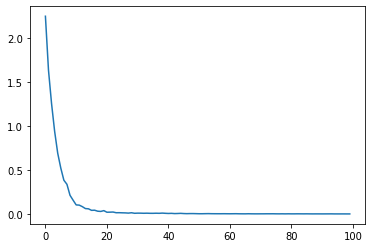

In [29]:
plt.plot(H2.history['loss'])